# MPII Human Pose

Original paper: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.638.2045&rep=rep1&type=pdf

## Y
The Y-value has the following structure: $10000\times 14 \times 3$. 
The data contains $14$ joint locations with the following order:
* Right ankle
* Right knee
* Right hip
* Left hip
* Left knee
* Left ankle
* Right wrist
* Right elbow
* Right shoulder
* Left shoulder
* Left elbow
* Left wrist
* Neck
* Head top

Each joint has $3$ values:
* X value
* Y value
* visiblity (1=True, 0=False)

In [1]:
%matplotlib inline

import sys
sys.path.insert(0,'../')
from pak import datasets
from pak import utils
import matplotlib.pyplot as plt

root = '/home/julian/Data/pak_test1'

mpii = datasets.MPII_human_pose(root)


from scipy.io import loadmat
from scipy.ndimage import imread

mat = mpii.root_export + "/mpii_human_pose_v1_u12_1.mat"
print(mat)

M_ = loadmat(mat)


# X, Y = mpii.get_raw()

# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot(111)
# x = X[0].astype('int32')
# gray = (x[:,:,0] + x[:,:,1] + x[:,:,2]) / (255*3)
# ax.imshow(gray, cmap='gray')
# y = Y[0]
# for x,y,v in y:
#     if v > 0:
#         ax.scatter(x, y, s=600)

def nbr_to_joint(i):
    if i == 0:
        return "r ankle"
    elif i == 1:
        return "r knee"
    elif i == 2:
        return "r hip"
    elif i == 3:
        return "l hip"
    elif i == 4:
        return "l knee"
    elif i == 5:
        return "l ankle"
    elif i == 6:
        return "pelvis"
    elif i == 7:
        return "thorax"
    elif i == 8:
        return "upper neck"
    elif i == 9:
        return "head top"
    elif i == 10:
        return "r wrist"
    elif i == 11:
        return "r elbow"
    elif i == 12:
        return "r shoulder"
    elif i == 13:
        return "l shoulder"
    elif i == 14:
        return "l elbow"
    elif i == 15:
        return "l wrist"
    else:
        raise Exception("Invalid joint id:" + str(i))

/home/julian/Data/pak_test1/mpii_human_pose_v1_u12_2 found :)
/home/julian/Data/pak_test1/mpii_human_pose_v1_u12_2/images found :)
/home/julian/Data/pak_test1/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat


number of people: 3
vidx:1, frame_sec:1290
(bb): ((1629, 183), (1795, 357))


/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


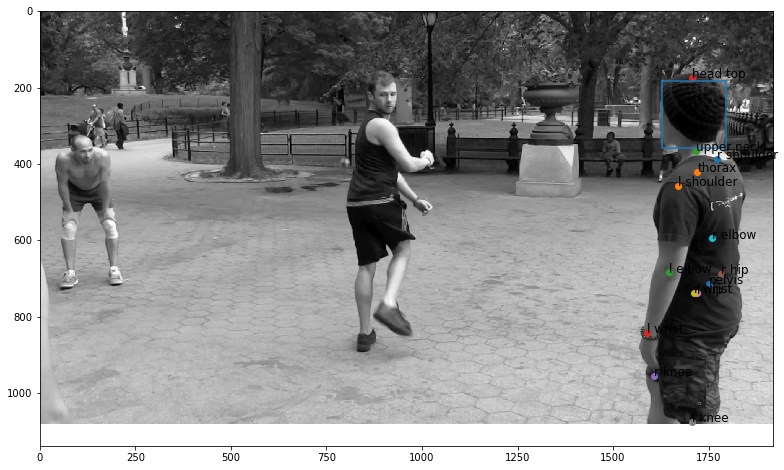

In [103]:
e = AL[0][0][0][151]


name= e[0][0][0][0][0]
_, nbr_persons = e[1].shape
print('number of people:', nbr_persons)

vidx = e[2][0][0]
frame_sec = e[3][0][0]
print("vidx:" + str(vidx) + ", frame_sec:" + str(frame_sec))

person = 1

x1 = e[1][0][person][0][0][0]
y1 = e[1][0][person][1][0][0]
x2 = e[1][0][person][2][0][0]
y2 = e[1][0][person][3][0][0]

print("(bb):", ((x1, y1), (x2, y2)))

joints = e[1][0][person][4][0][0][0][0]
#print(joints)

def compress_joints(joints):
    obj = []
    for x, y,joint_type, visible in joints:
        joint_type = joint_type[0][0]
        x = x[0][0]
        y = y[0][0]
        visible = int(visible[0]) if len(visible) == 1 else -1
        obj.append((joint_type, x, y, visible))
    return obj

obj = compress_joints(joints)

ax = plot_img(name,obj)

ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1])

#people 3


/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


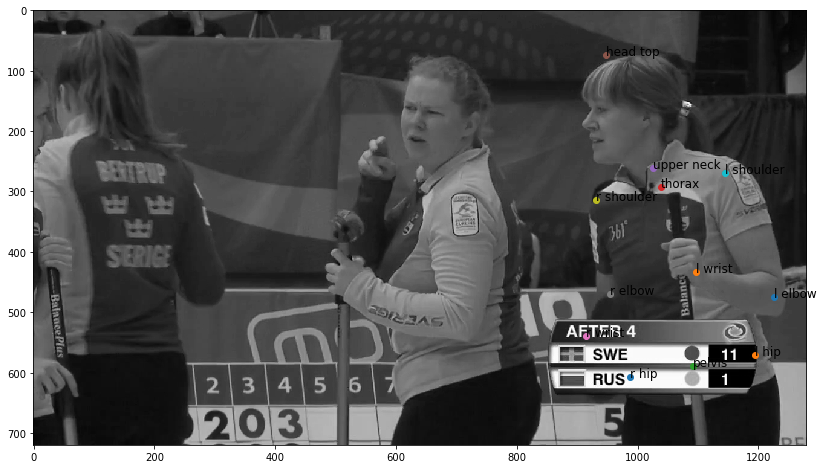

In [98]:
M = M_['RELEASE']

AL = M['annolist']

e = AL[0][0][0][5]
name= e[0][0][0][0][0]

_, nbr_persons = e[1].shape

print('#people', nbr_persons)

a = e[1][0][0][0][0][0]
b = e[1][0][0][1][0][0]
c = e[1][0][0][2][0][0]

    
    #print(e[1][0][0][0])
a1 = e[1][0][0][0] # uint16
a2 = e[1][0][0][1] # uint8

b1 = e[1][0][0][2] # uint16
b2 = e[1][0][0][3] # uint8

#c = e[1][0][0][4]
c = e[1][0][1][4]

person_elem = e[1][0][1][4]


def extract_figure(elem):
    elem = elem[0][0][0][0]

    obj = []
    for joint_type, x, y, visible in elem:
        joint_type = joint_type[0][0]
        x = x[0][0]
        y = y[0][0]
        visible = int(visible[0]) if len(visible) == 1 else -1
        obj.append((joint_type, x, y, visible))
    return obj

obj = extract_figure(person_elem)


def plot_img(name, obj=None):
    img_path = mpii.root_export + '/images/' + name
    img = imread(img_path)
    img = img.astype('int32')
    I = (img[:,:,0] + img[:,:,1] + img[:,:,2])/(255*3)

    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    ax.imshow(I, cmap='gray')

    if obj is not None:
        for joint,x,y,visible in obj:
            text = nbr_to_joint(joint)
            ax.scatter([x], [y])
            ax.text(x, y, text, fontsize=12)

        #ax.scatter([a1],[b1])

    return ax

plot_img(name, obj)